In [1]:
import numpy as np
import scipy as sp

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline 

In [4]:
from scipy.io import wavfile

In [5]:
from scipy.signal import fftconvolve
from scipy import signal

In [30]:
import os
import sys

In [38]:
audioPath = os.path.join(os.getcwd(),'..','rawAudio')

In [39]:
# take two cameras of the same motion

In [40]:
name1 = os.path.join(audioPath,'GP_B1_NL_15.wav')

In [41]:
name2 = os.path.join(audioPath,'GP_B3_SL_15.wav')

In [42]:
ts1 = wavfile.read(name1)
ts2 = wavfile.read(name2)

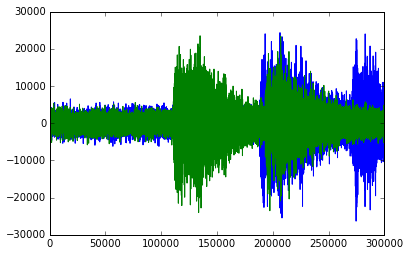

In [43]:
plt.plot(ts1[1][700000:1000000,1])
plt.plot(ts2[1][700000:1000000,1])
#plt.plot(ts1[1][0:,1])
#plt.plot(ts2[1][0:,1])

Let's try to find the lag of asynchrony by looking at the cross-correlation.

In [44]:
# the cross-correlation function in statsmodels does not use FFT so it is really slow
# from statsmodels.tsa.stattools import ccf
# res = ccf(ts1[1][200000:400000,1],ts2[1][200000:400000,1])

Cross-correlation on the signals is a bad idea! Two many oscillations.

Instead, we should get the envelope of the signal and cross-correlate.

In [45]:
# Warning - the envelope heights could be different for different cameras if there one is buffered

In [46]:
# Envelope based on the hilbert transform fails:
import scipy.signal.signaltools as sigtool
env = np.abs(sigtool.hilbert(ts1[1][:,1]))
#plt.plot(env)

We will try to get the envelopse by taking absolute values and then passing a low-pass filter.

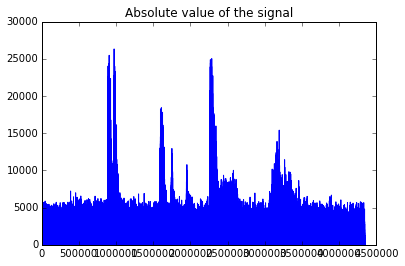

In [47]:
plt.plot(np.abs(ts1[1][:,1]))
plt.title('Absolute value of the signal')

In [48]:
# Another unsuccessful way of getting the envelope:
# hilb = sigtool.hilbert(ts1[1][:,1])
# env = (ts1[1][:,1] ** 2 + hilb ** 2) ** 0.5
# plt.plot(env)

In [49]:
# Creating a Butterworth filter
b, a = signal.butter(4, 7./48000, 'low')

In [50]:
# filtering 
# output_signal = signal.filtfilt(b, a, 2*ts1[1][:,1]*ts1[1][:,1])
output_signal1 = signal.filtfilt(b, a, np.abs(ts1[1][:,1]))
output_signal2 = signal.filtfilt(b, a, np.abs(ts2[1][:,1]))

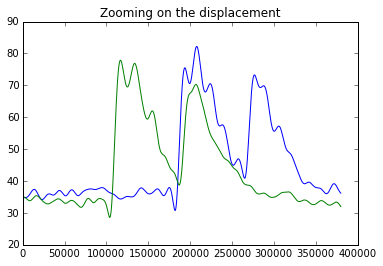

In [51]:
plt.plot(np.sqrt(output_signal1[700000:1080000]))
plt.plot(np.sqrt(output_signal2[700000:1080000]))
plt.title('Zooming on the displacement')

Calculate cross-correlation with FFT:

In [52]:
c = signal.fftconvolve(output_signal1[800000:1080000],output_signal2[800000:1080000][::-1], mode='full') 

559999
356858


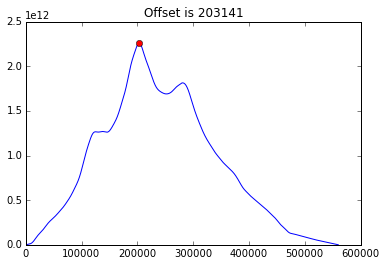

In [53]:
plt.plot(c[::-1])
print(c.shape[0])
print(c.argmax())
offset = c.shape[0]  - c.argmax()- 280000
plt.plot(280000+offset,c[c.argmax()],'ro')
plt.title('Offset is ' + str (280000+offset))

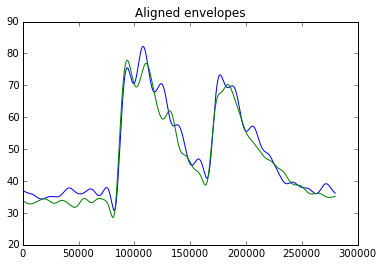

In [54]:
plt.plot(np.sqrt(output_signal1[800000:1080000]))
plt.plot(np.sqrt(output_signal2[800000+offset:(1080000+offset)]))
plt.title('Aligned envelopes')

On a large scale the envelopes seem aligned:

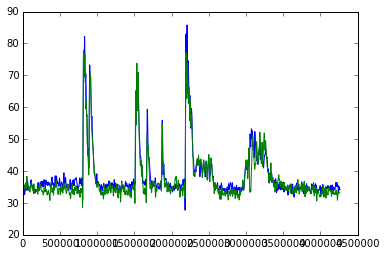

In [55]:
plt.plot(np.sqrt(output_signal1[np.abs(offset):]))
plt.plot(np.sqrt(output_signal2[:]))

Offset the original data:

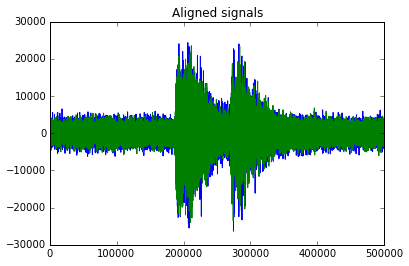

In [56]:
plt.plot(ts1[1][700000:1200000,1])
plt.plot(ts2[1][700000+offset:1200000+offset,1])
plt.title('Aligned signals')